# Загрузка данных

1. Загрузить датасет по ссылке: https://archive.ics.uci.edu/ml/datasets/iris .
Данные представлены в виде data файла. Данные представляют собой информацию о
трех классах цветов

2. Создать Python скрипт. Загрузить данные в датафрейм

In [0]:
import pandas as pd
import numpy as np

data = pd.read_csv('iris.data',header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [0]:
no_labeled_data = data[[0, 1, 2, 3]]
no_labeled_data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# K-means

1. Проведем кластеризацию методов k-средних

In [0]:
from sklearn.cluster import KMeans

k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(no_labeled_data)

KMeans(n_clusters=3, n_init=15)

2. Получим центры кластеров и определим какие наблюдения в какой кластер попали

In [0]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(no_labeled_data, k_means_cluster_centers)

3. Построим результаты классификации для признаков попарно (1 и 2, 2 и 3, 3 и 4)

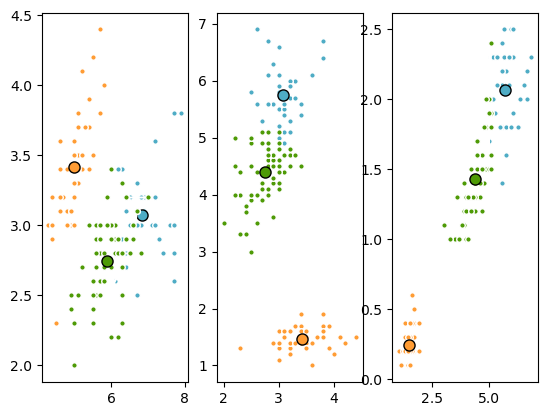

In [0]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 3)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

for i in range(3):
    my_members = k_means_labels == i
    cluster_center = k_means_cluster_centers[i]

    for j in range(3):
        ax[j].plot(no_labeled_data[my_members][j], no_labeled_data[my_members][j + 1], 'w',
                   markerfacecolor=colors[i], marker='o', markersize=4)
        ax[j].plot(cluster_center[j], cluster_center[j + 1], 'o',
                   markerfacecolor=colors[i], markeredgecolor='k', markersize=8)

plt.show()

Опишите полученные результаты. По каким из признаков произошло наилучшее
разделение. Как влияет значение параметра n_init

4. Уменьшите размерность данных до 2 используя метод главных компонент и нарисуйте
карту для всей области значений, на которой каждый кластер занимает определенную
область со своим цветом

In [0]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(no_labeled_data)
reduced_data

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [0]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(reduced_data)

k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(reduced_data, k_means_cluster_centers)

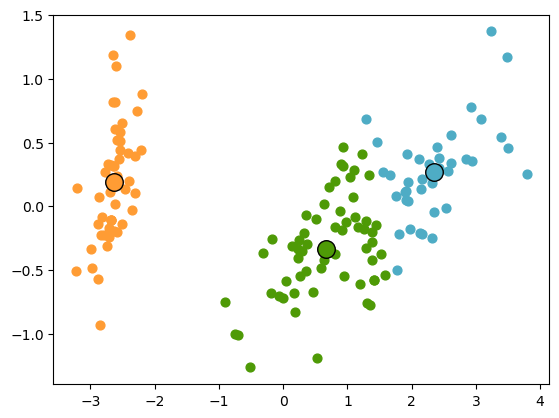

In [0]:
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

for i in range(3):
    my_members = k_means_labels == i
    cluster_center = k_means_cluster_centers[i]

    plt.scatter(reduced_data[my_members][:, 0], reduced_data[my_members][:, 1],
                c=colors[i], s=40)
    plt.scatter(cluster_center[0], cluster_center[1],
                c=colors[i], edgecolor='k', s=160)
                
plt.show()

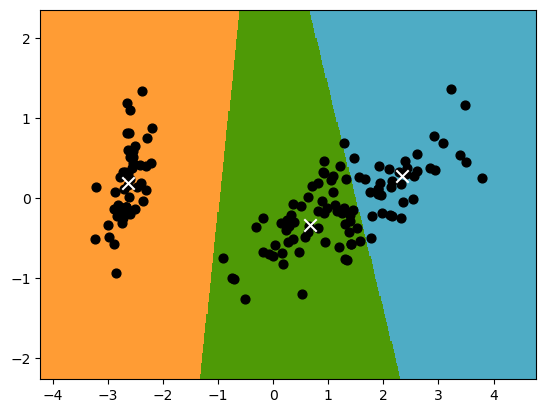

In [0]:
from matplotlib.colors import ListedColormap

colors = ['#4EACC5', '#FF9C34', '#4E9A06']

h = .02
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=ListedColormap(colors),
           aspect='auto', origin='lower')

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
            c='k', s=40)
plt.scatter(k_means_cluster_centers[:, 0], k_means_cluster_centers[:, 1],
            marker='x', c='w', edgecolor='k', s=80)

plt.show()

5. Исследуйте работу алгоритма k-средних при различных параметрах init. Сначала надо
выполнить несколько раз с параметров 'random', затем для вручную выбранных точек

6. Определите наилучшее количество методом локтя

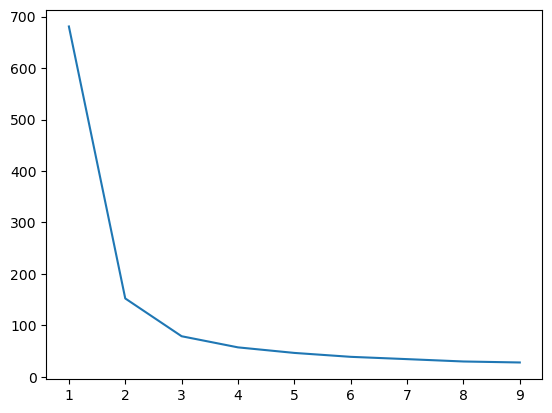

In [0]:
from scipy.spatial.distance import cdist
inertia=[]
for i in range(1,10):
    kmean = KMeans(n_clusters=i,init="k-means++")
    kmean.fit_predict(no_labeled_data)
    inertia.append(kmean.inertia_)

plt.plot(range(1,10), inertia)
plt.show()

7. Проведите кластеризацию используя пакетную кластеризацию k-средних . В чем
отличие от обычного метода k-средних. Постройте диаграмму рассеяния, на которой
будут выделено точки, которые для разных методов попали в разные кластеры

In [0]:
from sklearn.cluster import MiniBatchKMeans

mbk_means = MiniBatchKMeans(init='k-means++', n_clusters=3, n_init=5)
mbk_means.fit(reduced_data)

mbk_means_cluster_centers = mbk_means.cluster_centers_
mbk_means_labels = pairwise_distances_argmin(reduced_data, mbk_means_cluster_centers)

In [0]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=5)
k_means.fit(reduced_data)

k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(reduced_data, k_means_cluster_centers)

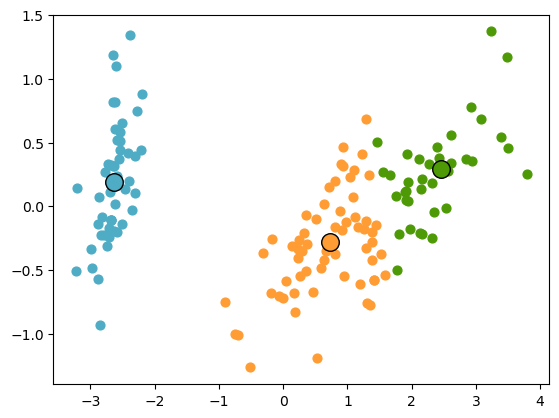

In [0]:
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

for i in range(3):
    my_members = mbk_means_labels == i
    cluster_center = mbk_means_cluster_centers[i]

    plt.scatter(reduced_data[my_members][:, 0], reduced_data[my_members][:, 1],
                c=colors[i], s=40)
    plt.scatter(cluster_center[0], cluster_center[1],
                c=colors[i], edgecolor='k', s=160)
                
plt.show()

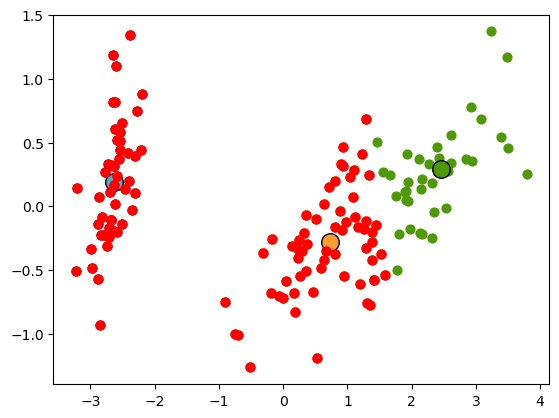

In [0]:
for i in range(3):
    my_members = mbk_means_labels == i
    cluster_center = mbk_means_cluster_centers[i]
    plt.scatter(reduced_data[my_members][:, 0], reduced_data[my_members][:, 1],
                c=colors[i], s=40)
    plt.scatter(cluster_center[0], cluster_center[1],
                c=colors[i], edgecolor='k', s=160)

    different = ((k_means_labels == i) != (mbk_means_labels == i))
    plt.scatter(reduced_data[different][:, 0], reduced_data[different][:, 1],
            c='r', s=40)

plt.show()

# Иерархическая кластеризация

1. Проведем иерархическую кластеризацию на тех же данных

In [0]:
from sklearn.cluster import AgglomerativeClustering

hier = AgglomerativeClustering(n_clusters=3, linkage='average')
hier = hier.fit(no_labeled_data)
hier_labels = hier.labels_

2. Отобразим результаты кластеризации

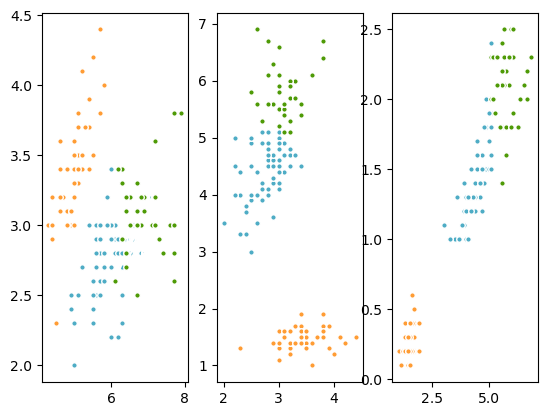

In [0]:
f, ax = plt.subplots(1, 3)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

for i in range(3):
    my_members = hier_labels == i
    for j in range(3):
        ax[j].plot(no_labeled_data[my_members][j],
                   no_labeled_data[my_members][j + 1], 'w',
                   markerfacecolor=colors[i], marker='o', markersize=4)

plt.show()

В чем отличия от метода k-средних

3. Проведите исследование для различного размера кластеров (от 2 до 5). Приведите
полученные результаты

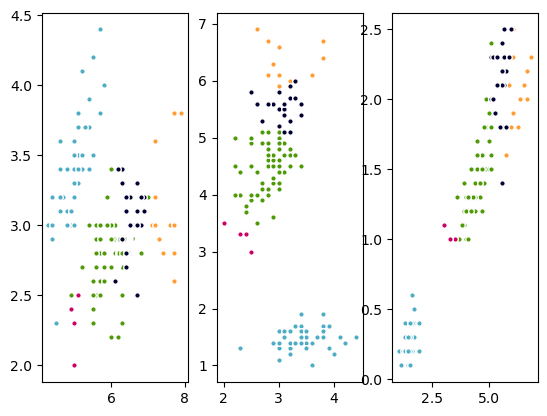

In [0]:
for c in range(2, 6):
    hier = AgglomerativeClustering(n_clusters=c, linkage='average')
    hier = hier.fit(no_labeled_data)
    hier_labels = hier.labels_

    f, ax = plt.subplots(1, 3)
    colors = ['#4EACC5', '#FF9C34', '#4E9A06', '#CC0066', '#000033']

    for i in range(c):
        my_members = hier_labels == i
        for j in range(3):
            ax[j].plot(no_labeled_data[my_members][j],
                    no_labeled_data[my_members][j + 1], 'w',
                    markerfacecolor=colors[i], marker='o', markersize=4)

    plt.show()

4. Нарисуйте дендограмму до уровня 6

In [0]:
hier = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hier = hier.fit(no_labeled_data)



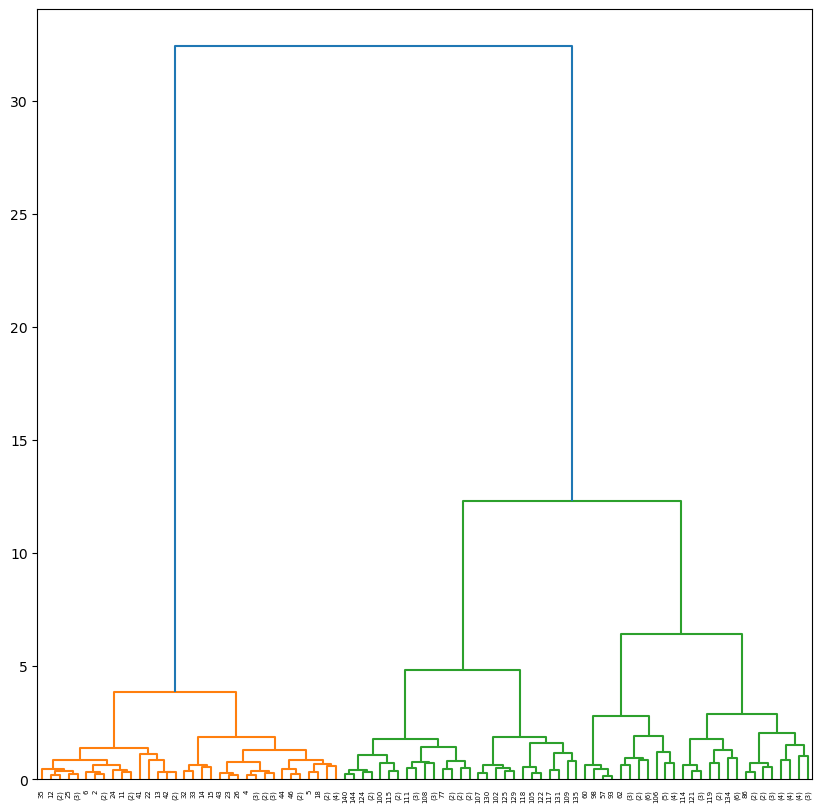

In [0]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(10,10))
plot_dendrogram(hier, truncate_mode='level', p=6)
plt.show()

5. Сгенерируйте случайные данные в виде двух колец

In [0]:
import random
import math

data1 = np.zeros([250, 2])
for i in range(250):
    r = random.uniform(1, 3)
    a = random.uniform(0, 2 * math.pi)
    data1[i, 0] = r * math.sin(a)
    data1[i, 1] = r * math.cos(a)

data2 = np.zeros([500, 2])
for i in range(500):
    r = random.uniform(5, 9)
    a = random.uniform(0, 2 * math.pi)
    data2[i, 0] = r * math.sin(a)
    data2[i, 1] = r * math.cos(a)

data = np.vstack((data1, data2))

6. Проведите иерархическую кластеризацию

In [0]:
hier = AgglomerativeClustering(n_clusters=2, linkage='ward')
hier = hier.fit(data)
hier_labels = hier.labels_

7. Выведите полученные результаты

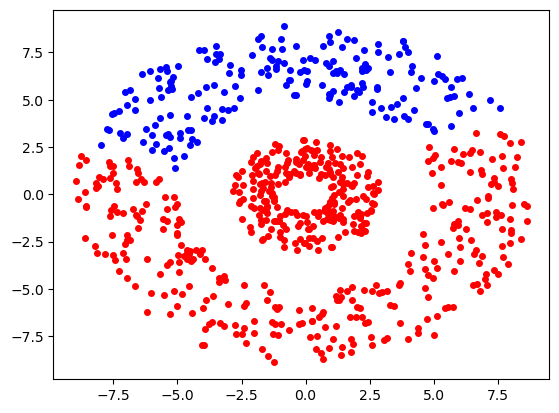

In [0]:
my_members = hier_labels == 0
plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',
         markersize=4,
         color='red', linestyle='None')
my_members = hier_labels == 1
plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',
         markersize=4,
         color='blue', linestyle='None')
plt.show()

8. Исследуйте кластеризацию при всех параметрах linkage. Отобразите и обоснуйте
полученные результаты. Для каких случаев, какой тип связи работает лучше всего.

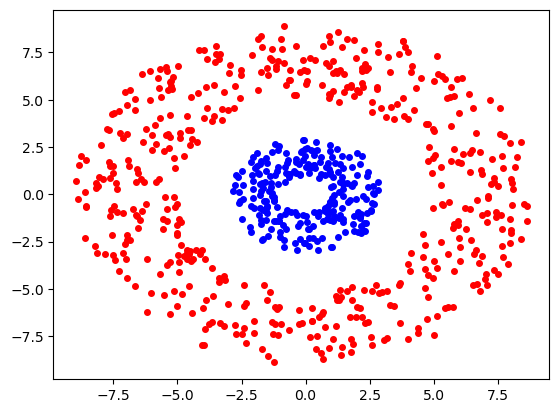

In [0]:
for lev in ['ward', 'complete', 'average', 'single']:
    hier = AgglomerativeClustering(n_clusters=2, linkage=lev)
    hier = hier.fit(data)
    hier_labels = hier.labels_

    my_members = hier_labels == 0
    plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',
            markersize=4,
            color='red', linestyle='None')
    my_members = hier_labels == 1
    plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',
            markersize=4,
            color='blue', linestyle='None')
    plt.show()